# REVIEW: Anomaly Detection with PyCaret

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data

In [2]:
dataset1 = [23,45,27,76,56,89,210, 78,43, 76,89,2, 54,87,12,90,98,345,76,45,14,76,16,17,9]
dataset2 = [23,45,27,76,56,89,23, 78,43, 76,89,2, 54,87,12,90,98,58,76,45,14,76,16,17,9]
dataset3 = np.ones(50)
df = pd.DataFrame(dataset1, columns = ["values"])

### functions

In [3]:
def plot(data, columname):
    assert columname in data.columns.tolist()
    assert "Anomaly" in data.columns.tolist() 
    _, ax = plt.subplots(figsize = (10,4))
    data[data["Anomaly"]==0].plot(kind = "scatter", x = "index", y = columname, ax = ax, color = 'blue')
    data[data["Anomaly"]==1].plot(kind = "scatter", x = "index", y = columname, ax = ax, color = 'red')
    plt.show()

# Anomaly Detection

In [4]:
from pycaret.anomaly import setup, create_model, assign_model, predict_model, models

In [5]:
models()

ValueError: _CURRENT_EXPERIMENT global variable is not set. Please run setup() first.

### isolation forest

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
iso_forest = create_model("iforest", contamination = "auto", random_state = 42)
print(iso_forest)
# assigning the labels
outliers_training = assign_model(iso_forest)
# predict
outliers_testing = predict_model(model = iso_forest, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,2809
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=42, verbose=0)


,values,Anomaly,Anomaly_Score
0,23,0,-0.155045
1,45,0,-0.149010
2,27,0,-0.103014
3,76,0,-0.191683
4,56,0,-0.137598
5,89,0,-0.168707
6,23,0,-0.155045
7,78,0,-0.121578
8,43,0,-0.099564
9,76,0,-0.191683


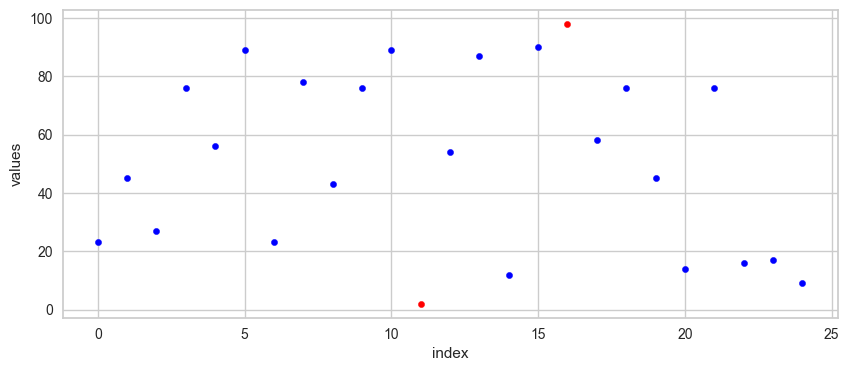

In [ ]:
plot(outliers_training.reset_index(), "values")

### knn

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
knn = create_model("knn")
print(knn)
# assigning the labels
outliers_training = assign_model(knn)
# predict
outliers_testing = predict_model(model = knn, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,2292
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


,values,Anomaly,Anomaly_Score
0,23,0,9.0
1,45,0,13.0
2,27,0,13.0
3,76,0,11.0
4,56,0,13.0
5,89,0,11.0
6,23,0,9.0
7,78,0,9.0
8,43,0,15.0
9,76,0,11.0


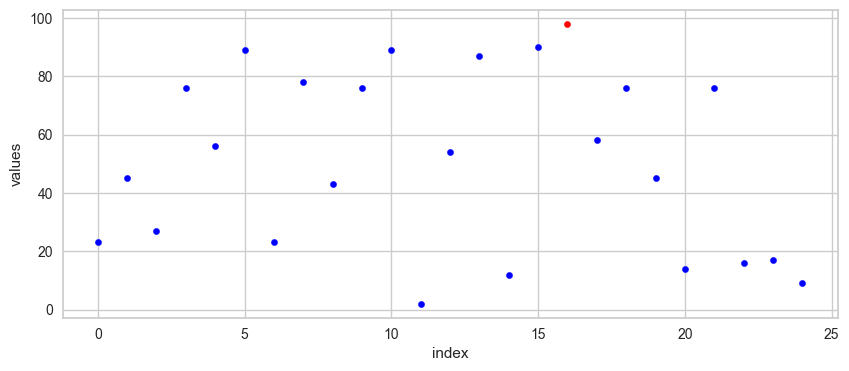

In [ ]:
plot(outliers_training.reset_index(), "values")

### Clustering-Based Local Outlier

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
cluster = create_model("cluster")
print(cluster)
# assigning the labels
outliers_training = assign_model(cluster)
# predict
outliers_testing = predict_model(model = cluster, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,5125
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


CBLOFForceToDouble(alpha=0.9, beta=5, check_estimator=False,
          clustering_estimator=None, contamination=0.05, n_clusters=8,
          n_jobs=None, random_state=5125, use_weights=False)


,values,Anomaly,Anomaly_Score
0,23,0,1.333333
1,45,0,0.666667
2,27,0,2.666667
3,76,0,0.400000
4,56,0,0.000000
5,89,0,0.250000
6,23,0,1.333333
7,78,0,1.600000
8,43,0,1.333333
9,76,0,0.400000


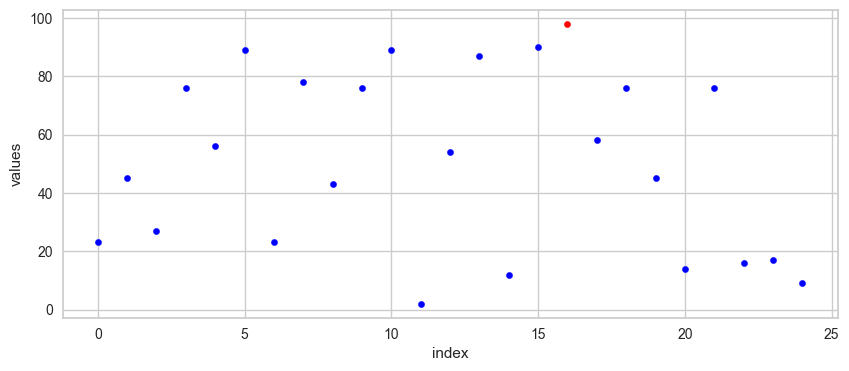

In [ ]:
plot(outliers_training.reset_index(), "values")

### pca

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
pca = create_model("pca")
print(pca)
# assigning the labels
outliers_training = assign_model(pca)
# predict
outliers_testing = predict_model(model = pca, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,726
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=726, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)


,values,Anomaly,Anomaly_Score
0,23,0,0.070407
1,45,0,0.796651
2,27,0,0.202451
3,76,0,1.819997
4,56,0,1.159774
5,89,0,2.249141
6,23,0,0.070407
7,78,0,1.886019
8,43,0,0.730629
9,76,0,1.819997


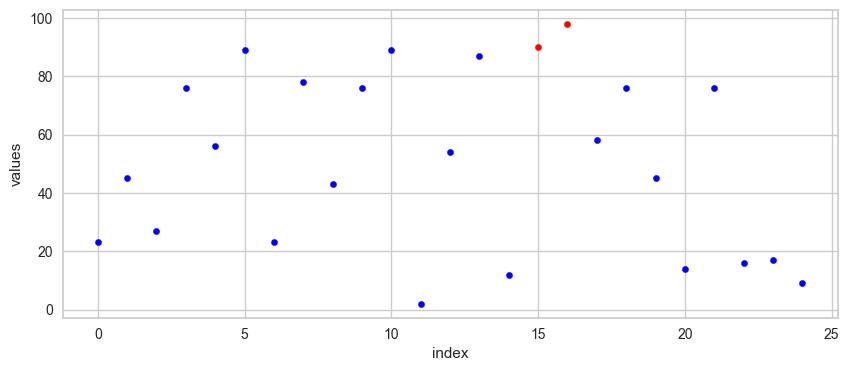

In [ ]:
plot(outliers_training.reset_index(), "values")

### Stochastic Outlier Selection

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
sos = create_model("sos")
print(sos)
# assigning the labels
outliers_training = assign_model(sos)
# predict
outliers_testing = predict_model(model = sos, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,8088
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:14:18
Status,. . . . . . . . . . . . . . . . . .,Fitting 0.05 Fraction
Estimator,. . . . . . . . . . . . . . . . . .,Stochastic Outlier Selection


SOS(contamination=0.05, eps=1e-05, metric='euclidean', perplexity=4.5)


,values,Anomaly,Anomaly_Score
0,23,0,0.032233
1,45,0,0.249682
2,27,0,0.351424
3,76,0,0.886367
4,56,0,0.619506
5,89,0,0.187624
6,23,0,0.032233
7,78,0,0.320175
8,43,0,0.260524
9,76,0,0.886367


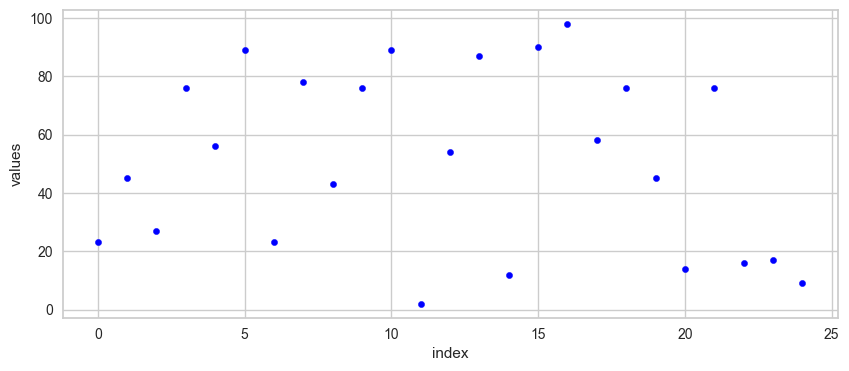

In [ ]:
plot(outliers_training.reset_index(), "values")

### Local Outlier Factor

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
lof = create_model("lof")
print(lof)
# assigning the labels
outliers_training = assign_model(lof)
# predict
outliers_testing = predict_model(model = lof, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,4661
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)


,values,Anomaly,Anomaly_Score
0,23,0,0.991588
1,45,0,1.009770
2,27,0,0.995051
3,76,0,0.991702
4,56,0,1.007353
5,89,0,0.992571
6,23,0,0.991588
7,78,0,0.989963
8,43,0,1.008904
9,76,0,0.991702


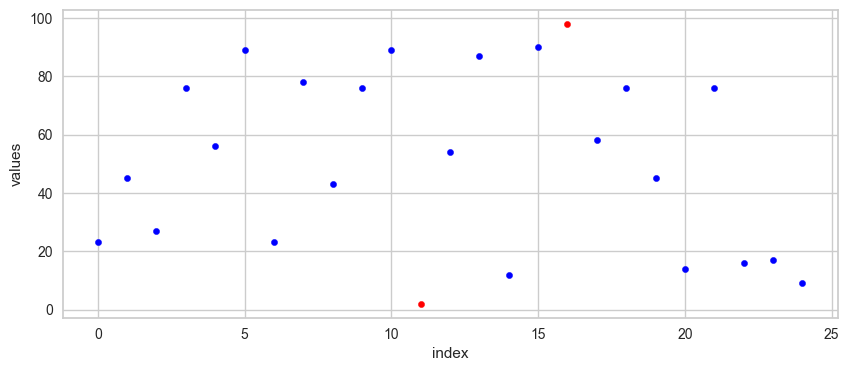

In [ ]:
plot(outliers_training.reset_index(), "values")

### Minimum Covariance Determinant

In [ ]:
# initialize setup
exp_forest = setup(data = df, numeric_features = ["values"], ignore_features = [], preprocess=False, log_experiment=False, experiment_name="exp_forest")
# create model
mcd = create_model("mcd")
print(mcd)
# assigning the labels
outliers_training = assign_model(mcd)
# predict
outliers_testing = predict_model(model = mcd, data = df.head())
# display
outliers_training

,Description,Value
0,Session id,7036
1,Original data shape,"(25, 1)"
2,Transformed data shape,"(25, 1)"
3,Numeric features,1


MCD(assume_centered=False, contamination=0.05, random_state=7036,
  store_precision=True, support_fraction=None)


,values,Anomaly,Anomaly_Score
0,23,0,0.864144
1,45,0,0.041351
2,27,0,0.636084
3,76,0,0.672394
4,56,0,0.025528
5,89,0,1.560354
6,23,0,0.864144
7,78,0,0.785029
8,43,0,0.072561
9,76,0,0.672394


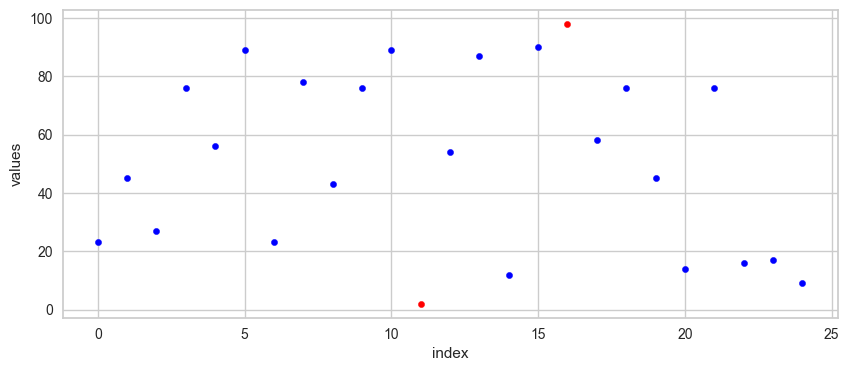

In [ ]:
plot(outliers_training.reset_index(), "values")